<h2><center>Trabalho de conclusão do curso de Especialização em Ciência de Dados da Facens</center></h2>
<h3><center>Faculdade de Engenharia de Sorocaba</center></h3>

**Alunos:** 
<p>
<p>Dani Shizue Sakamoto - RA: 191219
<p>Mariana de Castro Pires Tavares Albuquerque - RA: 191224
<p>Tan Kim Wah - RA: 141462

<h2><center>Treinamento com o modelo InceptionResNetV2 - Optimizer=RMSprop - Sigmoid</center></h2>
<h2><center>(Adulto e Criança)</center></h2>

#### Importando as bibliotecas

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from random import shuffle

import keras
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers. normalization import BatchNormalization
from keras.applications import InceptionResNetV2
from keras import optimizers

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Using TensorFlow backend.


#### Diretórios das imagens

In [ ]:
dir_train_adult = './datasets/images/train/Adult'
dir_train_child = './datasets/images/train/Child'

In [ ]:
dir_test_adult = './datasets/images/test/Adult'
dir_test_child = './datasets/images/test/Child'

In [ ]:
image_size = (256, 256)
train_data = []
test_data = []

#### Função que carrega as imagens de treino

In [ ]:
def load_training_data():
    
    for img in os.listdir(dir_train_adult):
        label = 'Adult'
        path = os.path.join(dir_train_adult, img)

        try:
            img = Image.open(path)
            label_array = np.array(label)
            train_data.append([np.asarray(img.resize(image_size)), label_array])
        except:
            pass
           
    for img in os.listdir(dir_train_child):
        label = 'Child'
        path = os.path.join(dir_train_child, img)
    
        try:
            img = Image.open(path)
            label_array = np.array(label)
            train_data.append([np.asarray(img.resize(image_size)), label_array])
        except:
            pass
       
        
    shuffle(train_data)
    return train_data

In [ ]:
train_data = load_training_data()

#### Função que carrega as imagens de teste

In [ ]:
def load_test_data():

    for img in os.listdir(dir_test_adult):
        label = 'Adult'
        path = os.path.join(dir_test_adult, img)
 
        try:
            img = Image.open(path)
            label_array = np.array(label)
            test_data.append([np.asarray(img.resize(image_size)), label_array])
        except:
            pass
           
    for img in os.listdir(dir_test_child):
        label = 'Child'
        path = os.path.join(dir_test_child, img)
    
        try:
            img = Image.open(path)
            label_array = np.array(label)
            test_data.append([np.asarray(img.resize(image_size)), label_array])
        except:
            pass
       
        
    shuffle(test_data)
    return test_data

In [ ]:
test_data = load_test_data()

In [ ]:
train_images = np.array([i[0] for i in train_data])
train_labels = np.array([i[1] for i in train_data])

In [ ]:
test_images = np.array([i[0] for i in test_data])
test_labels = np.array([i[1] for i in test_data])

In [ ]:
le = LabelEncoder()
labels_train = le.fit_transform(train_labels)
labels_test = le.transform(test_labels)

In [ ]:
labels_train = to_categorical(labels_train, num_classes=2)
labels_test = to_categorical(labels_test, num_classes=2)

In [ ]:
X_train = train_images
y_train = labels_train

In [ ]:
X_test = test_images
y_test = labels_test

#### Definindo Hiperparâmetros
<p style='text-align: justify;'>
Os hiperparâmetros definem como deseja treinar a rede neural (períodos de treinamento), tamanho do lote, taxa de aprendizado, função de otimização, configuração da rede neural (camadas, unidades ocultas em camadas, função de ativação, etc). 
Durante a fase de treinamento de um projeto de aprendizado profundo, você pode querer ajustar esses hiperparâmetros para obter o desempenho ideal do modelo de rede neural.</p>

In [ ]:
batchSize   = 32
max_epochs  = 5
inputShape  = (256, 256, 3)
optimizer   = optimizers.RMSprop(lr=2e-5)

## TRANSFER LEARNING
<p style='text-align: justify;'>
A aprendizagem por transferência tem o benefício de diminuir o tempo de treinamento para um modelo de rede neural e pode resultar em um erro de generalização menor. O objetivo é aproveitar os dados da primeira configuração para extrair informações que podem ser úteis ao aprender ou mesmo ao fazer previsões diretamente na segunda configuração.</p>

https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/ 

### InceptionResNetV2
Modelo Inception-ResNet V2, com pesos pré-treinados em ImageNet. 

Arquitetura Inception, demonstrou atingir um desempenho muito bom a um custo computacional relativamente baixo.
https://arxiv.org/abs/1602.07261 (arXiv:1602.07261 [cs.CV]as bibtex)

In [ ]:
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=inputShape)

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

#### Ajusta o gerador de treinamento

In [ ]:
print("Iniciando treinamento... ")

history = model.fit(X_train, y_train, batch_size=batchSize, verbose=1, epochs=max_epochs)

print("Treinamento finalizado \n")

Iniciando treinamento... 
Epoch 1/5
11764/11764 [==============================] - 951s 81ms/step - loss: 0.2607 - acc: 0.8967
Epoch 2/5
11764/11764 [==============================] - 863s 73ms/step - loss: 0.0656 - acc: 0.9780
Epoch 3/5
11764/11764 [==============================] - 863s 73ms/step - loss: 0.0220 - acc: 0.9930
Epoch 4/5
11764/11764 [==============================] - 866s 74ms/step - loss: 0.0128 - acc: 0.9967
Epoch 5/5
11764/11764 [==============================] - 866s 74ms/step - loss: 0.0085 - acc: 0.9974
Treinamento finalizado 



#### Salvando modelo

In [ ]:
model.save("model_inceptionresnetv2_sigmoid_ac.h5")

#### Histórico de treinamento (Precisão e Perda)

dict_keys(['loss', 'acc'])


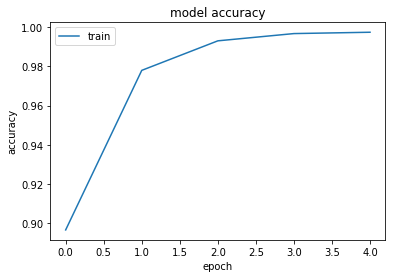

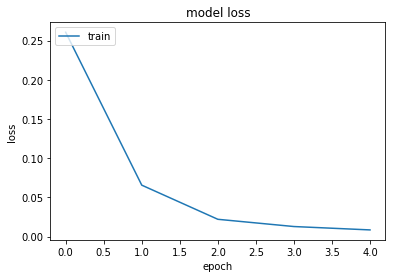

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### Gerador de Predição
Gera previsões para as amostras

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
y_pred_train = [np.argmax(i) for i in y_pred_train]
y_pred_test = [np.argmax(j) for j in y_pred_test]

In [ ]:
y_pred_train = le.inverse_transform(y_pred_train)
y_pred_test = le.inverse_transform(y_pred_test)

In [ ]:
y_true_train = [np.argmax(i) for i in y_train]
y_true_test = [np.argmax(j) for j in y_test]

In [ ]:
y_true_train = le.inverse_transform(y_true_train)
y_true_test = le.inverse_transform(y_true_test)

In [ ]:
y_true_train[1]

'Adult'

In [ ]:
y_true_test[1]

'Adult'

In [ ]:
print('Performance do treinamento')
print(classification_report(y_true_train, y_pred_train))

print('Performance do teste')
print(classification_report(y_true_test, y_pred_test))

Performance do treinamento
              precision    recall  f1-score   support

       Adult       1.00      1.00      1.00      7027
       Child       1.00      1.00      1.00      4737

    accuracy                           1.00     11764
   macro avg       1.00      1.00      1.00     11764
weighted avg       1.00      1.00      1.00     11764

Performance do teste
              precision    recall  f1-score   support

       Adult       0.97      0.99      0.98      3012
       Child       0.98      0.96      0.97      2032

    accuracy                           0.97      5044
   macro avg       0.97      0.97      0.97      5044
weighted avg       0.97      0.97      0.97      5044



In [ ]:
cm = confusion_matrix(y_true_test, y_pred_test)
cm

array([[2968,   44],
       [  86, 1946]])

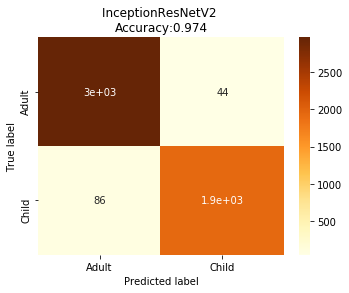

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = le.classes_, 
                     columns = le.classes_)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap="YlOrBr")
plt.title('InceptionResNetV2 \nAccuracy:{0:.3f}'.format(accuracy_score(y_true_test, y_pred_test)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()